<a href="https://colab.research.google.com/github/vishalpeddaraju/Eng2Hindi-Neural-Machine/blob/main/DNA_Human_Chimapnzees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve

In [ ]:
label = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

In [ ]:
human_data = pd.read_table('/content/drive/MyDrive/Project2/human_data.txt')

In [ ]:
human_data.head(10)


,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
5,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
6,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3
7,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
8,ATGAAGATTGCACACAGAGGTCCAGATGCATTCCGTTTTGAGAATG...,3
9,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3


In [ ]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
human_data.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


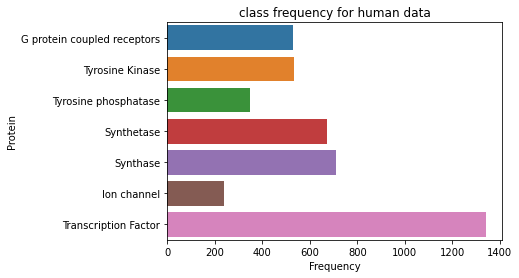

In [ ]:
sns.barplot(x=human_data['class'].value_counts().sort_index(),y=label)
plt.title("class frequency for human data")
plt.xlabel('Frequency')
plt.ylabel('Protein')
plt.show()

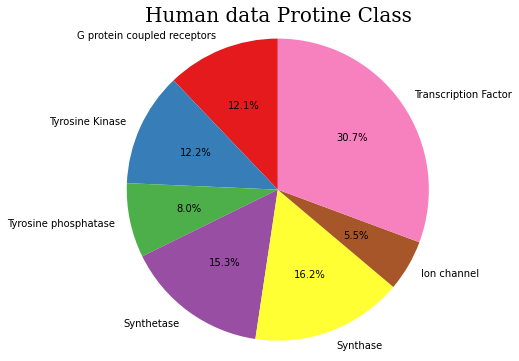

In [ ]:
plt.figure(figsize=(6,6))
font_dict = font = {'family': 'serif',
                    'color': 'Black',
                    'Weight': 'normal',
                    'size': 20}

a = np.random.random(7)
cs = cm.Set1(np.arange(7)/7)
plt.pie(human_data['class'].value_counts().sort_index(),labels=label,autopct='%1.1f%%', colors = cs, startangle=90)
plt.axis('equal')
plt.title("Human data Protine Class", fontdict=font_dict)
plt.show()                   

In [ ]:
Chimpanzee_data = pd.read_table('/content/drive/MyDrive/Project2/chimp_data.txt')

In [ ]:
Chimpanzee_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
Chimpanzee_data.describe()

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


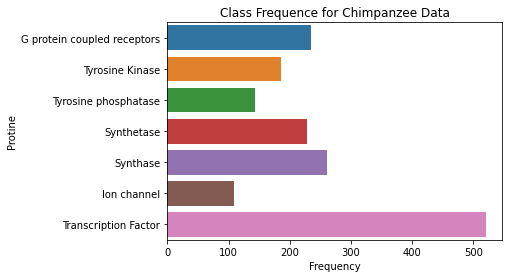

In [ ]:
sns.barplot(x=Chimpanzee_data['class'].value_counts().sort_index(), y=label)
plt.title('Class Frequence for Chimpanzee Data')
plt.xlabel('Frequency')
plt.ylabel('Protine')
plt.show()

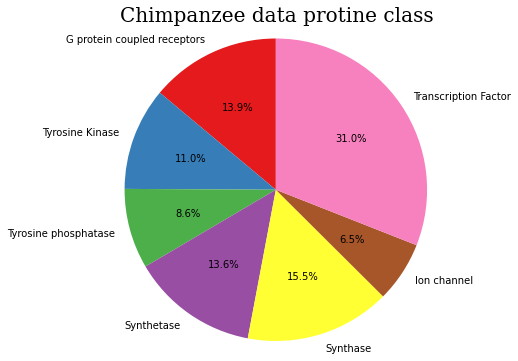

In [ ]:
#from numpy import random
plt.figure(figsize=(6,6))
font_dict = font = {'family': 'serif',
                    'color': 'Black',
                    'Weight': 'normal',
                    'size': 20}

a = np.random.random(7)
cs = cm.Set1(np.arange(7)/7)
plt.pie(Chimpanzee_data['class'].value_counts().sort_index(), labels=label, autopct='%1.1f%%', colors = cs, startangle=90)
plt.axis('equal')
plt.title('Chimpanzee data protine class', fontdict=font_dict)      
plt.show()              

In [ ]:
def getKmers(sequence, size=6):
  return[sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
cv = CountVectorizer(ngram_range=(4,4))

In [ ]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

In [ ]:
human_texts = list(human_data['words'])
for i in range(len(human_data)):
  human_texts[i] = ' '.join(human_texts[i])

In [ ]:
x_human = cv.fit_transform(human_texts)
y_human = human_data.iloc[:, 0].values

In [ ]:
print(x_human.shape, y_human.shape)

(4380, 232414) (4380,)


In [ ]:
human_texts[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [ ]:
X_train_humans, X_test_humans, Y_train_humans, Y_test_humans = train_test_split(x_human,y_human, test_size=0.25, random_state=42)

# For Humans Data DNA Set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTrees_humans = DecisionTreeClassifier()
DecisionTrees_humans.fit(X_train_humans,Y_train_humans)
DecisionTrees_humans_predict = DecisionTrees_humans.predict(X_test_humans)

In [ ]:
print("Accuracy for Human Data using Decision Tree Classifier :", accuracy_score(DecisionTrees_humans_predict,Y_test_humans))

Accuracy for Human Data using Decision Tree Classifier : 0.8036529680365296


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_Humans = RandomForestClassifier()
RandomForest_Humans.fit(X_train_humans,Y_train_humans)
RandomForest_Humans_predict = RandomForest_Humans.predict(X_test_humans)

In [ ]:
print("Accuracy of Human Data using Random Forest Classifer :", accuracy_score(RandomForest_Humans_predict,Y_test_humans))

Accuracy of Human Data using Random Forest Classifer : 0.9114155251141552


In [ ]:
import xgboost as xgb
XGB_humans = xgb.XGBClassifier()
XGB_humans.fit(X_train_humans, Y_train_humans)
XGB_Humans_predict = XGB_humans.predict(X_test_humans)

In [ ]:
print("Accuracy of Human Data using XGB Classifier :", accuracy_score(XGB_Humans_predict,Y_test_humans))

Accuracy of Human Data using XGB Classifier : 0.7844748858447489


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NaiveBayes_humans = MultinomialNB(alpha=0.1)
NaiveBayes_humans.fit(X_train_humans,Y_train_humans)
NaiveBayes_Humans_predict = NaiveBayes_humans.predict(X_test_humans)

In [ ]:
print("Accuracy of Human Data using NaiveBayes Classifier :", accuracy_score(NaiveBayes_Humans_predict,Y_test_humans))

Accuracy of Human Data using NaiveBayes Classifier : 0.9780821917808219


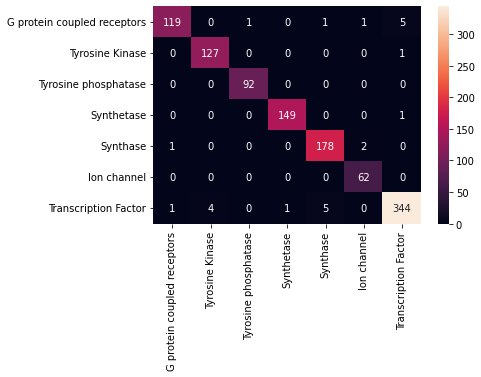

In [ ]:
cm = confusion_matrix(NaiveBayes_Humans_predict, Y_test_humans)
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label, fmt='g')

In [ ]:
print(classification_report(NaiveBayes_Humans_predict,Y_test_humans))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.97      0.99      0.98       128
           2       0.99      1.00      0.99        92
           3       0.99      0.99      0.99       150
           4       0.97      0.98      0.98       181
           5       0.95      1.00      0.98        62
           6       0.98      0.97      0.97       355

    accuracy                           0.98      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



# For Chimpanzee Data DNA Set

In [ ]:
Chimpanzee_data['words']=Chimpanzee_data.apply(lambda x: getKmers(x['sequence']), axis=1)
Chimpanzee_data = Chimpanzee_data.drop('sequence', axis=1)

In [ ]:
Chimpanzee_text = list(Chimpanzee_data['words'])
for i in range(len(Chimpanzee_text)):
  Chimpanzee_text[i] = ' '.join(Chimpanzee_text[i])

In [ ]:
X_Chimpanzee = cv.transform(Chimpanzee_text)
Y_Chimpanzee = Chimpanzee_data.iloc[:, 0].values

In [ ]:
X_train_Chimpanzee, X_test_chimpanzee, Y_train_chimpanzee, Y_test_chimpanzee = train_test_split(X_Chimpanzee,Y_Chimpanzee, test_size=0.25, random_state=42)

In [ ]:
DecisionTree_Chimpanzees = DecisionTreeClassifier()
DecisionTree_Chimpanzees.fit(X_train_Chimpanzee,Y_train_chimpanzee)
DecisionTree_Chimpanzees_predict = DecisionTree_Chimpanzees.predict(X_test_chimpanzee)

In [ ]:
print("Accuracy of Chimpanzee using Decision Tree Classifier :", accuracy_score(DecisionTree_Chimpanzees_predict,Y_test_chimpanzee))

Accuracy of Chimpanzee using Decision Tree Classifier : 0.7672209026128266


In [ ]:
RandomForest_Chimpanzees = MultinomialNB()
RandomForest_Chimpanzees.fit(X_train_Chimpanzee,Y_train_chimpanzee)
RandomForest_Chimpanzees_predict = RandomForest_Chimpanzees.predict(X_test_chimpanzee)

In [ ]:
print("Accuracy of Chimapnzee using Random Forest Classifier :", accuracy_score(RandomForest_Chimpanzees_predict,Y_test_chimpanzee))

Accuracy of Chimapnzee using Random Forest Classifier : 0.9121140142517815


In [ ]:
XGB_Chimpanzees = xgb.XGBClassifier()
XGB_Chimpanzees.fit(X_train_Chimpanzee,Y_train_chimpanzee)
XGB_chimpanzees_predict = XGB_Chimpanzees.predict(X_test_chimpanzee)

In [ ]:
print("Accuracy of Chimpanzee using XBG Boost Classifier :", accuracy_score(XGB_chimpanzees_predict, Y_test_chimpanzee))

Accuracy of Chimpanzee using XBG Boost Classifier : 0.7862232779097387


In [ ]:
NavieBayes_chimpanzee = MultinomialNB()
NavieBayes_chimpanzee.fit(X_train_Chimpanzee,Y_train_chimpanzee)
NavieBayes_chimpanzee_predict = NavieBayes_chimpanzee.predict(X_test_chimpanzee)

In [ ]:
print("Accuracy of Chimpanzee using NavieBayes Classifier:", accuracy_score(NavieBayes_chimpanzee_predict,Y_test_chimpanzee))

Accuracy of Chimpanzee using NavieBayes Classifier: 0.9121140142517815


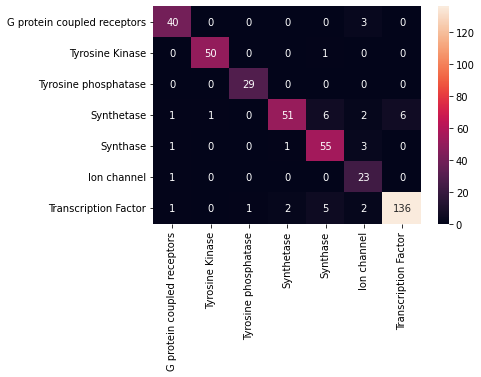

In [ ]:
cm = confusion_matrix(NavieBayes_chimpanzee_predict, Y_test_chimpanzee)
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label, fmt='g')

In [ ]:
print(classification_report(NavieBayes_chimpanzee_predict, Y_test_chimpanzee))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.98      0.98      0.98        51
           2       0.97      1.00      0.98        29
           3       0.94      0.76      0.84        67
           4       0.82      0.92      0.87        60
           5       0.70      0.96      0.81        24
           6       0.96      0.93      0.94       147

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.91       421

